In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Most paid

**Naloga**

Želimo najti top 4 plačane igralce. Nato uzeti njhove ekipe in prikazati top 3 plačane igralce iz vsake ekipe.


REŠITEV:
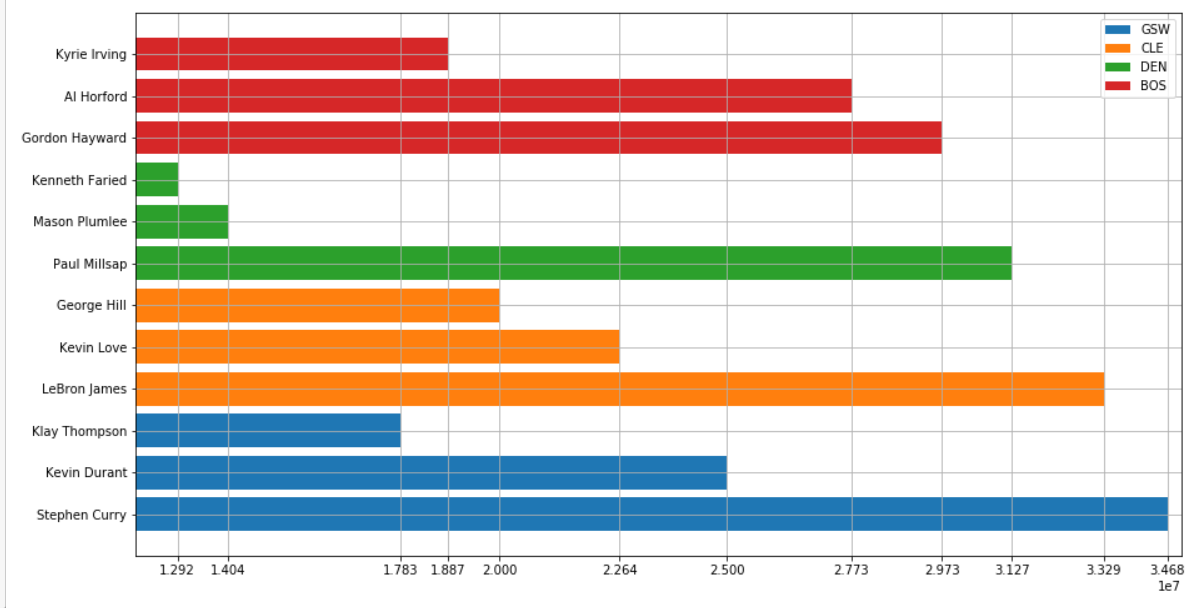

## Checking out the Data

* index
> unique vrednost za vsakega igralca. Lahko spremenimo v dejanski index

* Player
> Ime igralca. Ime se lahko podvaja, ker igra za drugačne ekipe

* NBA_DraftNumber
> Nism ziher. Ni važn kej precej

* Salary
> Za kolk ga najamejo (se mi zdi). Pol so še zajebancije ker majo različne pogodbe itd.. sam tist ni važn

* Age
> kolk je star

* Tm
> Team. Kera ekipa

https://www.basketball-reference.com/about/glossary.html#pf

* G
> Games played for that team (se mi zdi)

* MP
> Minutes played. Vse minute seštete skupi


* PER
> Player Efficiency Rating

* TS%
> True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws

* 3PAr
> 3-Point Field Goal Percentage (available since the 1979-80 season in the NBA); the formula is 3P / 3PA.

* FTr
> Free Throw Percentage; the formula is FT / FTA

* ORB%
> Offensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB)). Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.

* DRB%
> Defensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB)). Defensive rebound percentage is an estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.


* TRB%
> Total Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (TRB * (Tm MP / 5)) / (MP * (Tm TRB + Opp TRB)). Total rebound percentage is an estimate of the percentage of available rebounds a player grabbed while he was on the floor.


* AST%
> Assist Percentage (available since the 1964-65 season in the NBA); the formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG). Assist percentage is an estimate of the percentage of teammate field goals a player assisted while he was on the floor.


* STL%
> STL% - Steal Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (STL * (Tm MP / 5)) / (MP * Opp Poss). Steal Percentage is an estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.


* BLK%
> Block Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA)). Block percentage is an estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.


In [4]:
nba_data = pd.read_csv("data/nba_data.csv")

In [5]:
print(nba_data.info())
nba_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 20 columns):
index              651 non-null int64
Player             651 non-null object
NBA_DraftNumber    651 non-null int64
Salary             651 non-null object
Signed Using       431 non-null object
Guaranteed         651 non-null object
Age                651 non-null int64
Tm                 651 non-null object
G                  651 non-null int64
MP                 651 non-null int64
PER                651 non-null float64
TS%                647 non-null float64
3PAr               647 non-null float64
FTr                647 non-null float64
ORB%               651 non-null float64
DRB%               651 non-null float64
TRB%               651 non-null float64
AST%               651 non-null float64
STL%               651 non-null float64
BLK%               651 non-null float64
dtypes: float64(10), int64(5), object(5)
memory usage: 101.8+ KB
None


,index,Player,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
0,0,Zhou Qi,43,"$815,615",MLE,"$815,615",22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8
1,1,Zaza Pachulia,42,"$3,477,600",NaN,"$3,477,600",33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3
2,2,Zach Randolph,19,"$12,307,692",Cap space,"$24,000,000",36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6
3,3,Zach LaVine,13,"$3,202,217",1st Round Pick,"$3,202,217",22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5
4,4,Zach Collins,10,"$3,057,240",1st Round Pick,"$6,686,160",20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5


In [ ]:
# Vidmo, da imamo index stolpec, ki bi lahko bil dejanski index našega datafram-a
# Ime igralca najdemo v "Player" stolpcu
# Ekipo igralca najdemo znotraj "Tm" stolpca
# Plačo najdemo v "Salary" stolpcu. Vidimo, da je plača tipa object (ni številka). Potrebno jo bo spremeniti v številčno vrednost


In [8]:
# Indexing our DF
nba_data.set_index(keys="index", inplace=True)
nba_data.head()

,Player,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
index,,,,,,,,,,,,,,,,,,,
0,Zhou Qi,43,"$815,615",MLE,"$815,615",22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8
1,Zaza Pachulia,42,"$3,477,600",NaN,"$3,477,600",33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3
2,Zach Randolph,19,"$12,307,692",Cap space,"$24,000,000",36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6
3,Zach LaVine,13,"$3,202,217",1st Round Pick,"$3,202,217",22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5
4,Zach Collins,10,"$3,057,240",1st Round Pick,"$6,686,160",20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5


In [9]:
# Checking Salary column
nba_data["Salary"].value_counts()
# Znebit se $
# znebit se ,
# pretvorit v "integer" datatip

$0             50
$1,312,611     34
$1,471,382     23
$815,615       17
$1,524,305     15
$92,160        14
$50,000        12
$2,328,652     12
$2,116,955     11
$1,577,230     10
$6,000,000      8
$83,129         8
$7,000,000      6
$148,318        5
$16,000,000     5
$1,709,538      5
$17,884,176     5
$12,500,000     4
$22,642,350     4
$23,775,506     4
$3,290,000      4
$9,125,000      4
$7,420,912      4
$1,889,040      4
$2,500,000      4
$46,080         3
$3,294,994      3
$3,028,410      3
$11,562,500     3
$6,261,395      3
               ..
$2,904,480      1
$11,825,000     1
$2,100,000      1
$23,000,000     1
$3,949,999      1
$1,050,000      1
$2,569,920      1
$7,692,308      1
$6,300,000      1
$1,386,600      1
$2,301,360      1
$2,684,160      1
$9,000,000      1
$2,441,400      1
$4,992,385      1
$9,470,614      1
$5,513,514      1
$239,204        1
$14,275,000     1
$3,903,900      1
$14,800,000     1
$4,538,020      1
$9,769,821      1
$4,615,385      1
$2,759,280

In [10]:
nba_data["Salary"] = nba_data["Salary"].str.replace("$", "")
nba_data["Salary"] = nba_data["Salary"].str.replace(",", "")
nba_data["Salary"].value_counts()

0           50
1312611     34
1471382     23
815615      17
1524305     15
92160       14
50000       12
2328652     12
2116955     11
1577230     10
83129        8
6000000      8
7000000      6
17884176     5
16000000     5
1709538      5
148318       5
23775506     4
12500000     4
3290000      4
1889040      4
2500000      4
22642350     4
9125000      4
7420912      4
87552        3
15550000     3
3028410      3
1504560      3
3381480      3
            ..
14112360     1
2186400      1
5200000      1
7630000      1
3097800      1
3704160      1
29727900     1
2106407      1
19332500     1
238020       1
6300000      1
1936920      1
17826150     1
7319035      1
24773250     1
9470614      1
22434783     1
13954000     1
17190000     1
14100000     1
1184385      1
17000450     1
14136364     1
3903900      1
5513514      1
16500000     1
2151704      1
23000000     1
5645400      1
13788500     1
Name: Salary, Length: 304, dtype: int64

In [12]:
nba_data.info()
# Salary še kar ni integer ampak object (string). Potrebno ga je spremeniti.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 19 columns):
Player             651 non-null object
NBA_DraftNumber    651 non-null int64
Salary             651 non-null object
Signed Using       431 non-null object
Guaranteed         651 non-null object
Age                651 non-null int64
Tm                 651 non-null object
G                  651 non-null int64
MP                 651 non-null int64
PER                651 non-null float64
TS%                647 non-null float64
3PAr               647 non-null float64
FTr                647 non-null float64
ORB%               651 non-null float64
DRB%               651 non-null float64
TRB%               651 non-null float64
AST%               651 non-null float64
STL%               651 non-null float64
BLK%               651 non-null float64
dtypes: float64(10), int64(4), object(5)
memory usage: 101.7+ KB


In [13]:
# Changing datatype

nba_data["Salary"] = pd.to_numeric(nba_data["Salary"])
print(nba_data.info())
nba_data["Salary"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 19 columns):
Player             651 non-null object
NBA_DraftNumber    651 non-null int64
Salary             651 non-null int64
Signed Using       431 non-null object
Guaranteed         651 non-null object
Age                651 non-null int64
Tm                 651 non-null object
G                  651 non-null int64
MP                 651 non-null int64
PER                651 non-null float64
TS%                647 non-null float64
3PAr               647 non-null float64
FTr                647 non-null float64
ORB%               651 non-null float64
DRB%               651 non-null float64
TRB%               651 non-null float64
AST%               651 non-null float64
STL%               651 non-null float64
BLK%               651 non-null float64
dtypes: float64(10), int64(5), object(4)
memory usage: 101.7+ KB
None


0           50
1312611     34
1471382     23
815615      17
1524305     15
92160       14
50000       12
2328652     12
2116955     11
1577230     10
83129        8
6000000      8
7000000      6
16000000     5
17884176     5
148318       5
1709538      5
12500000     4
9125000      4
1889040      4
3290000      4
23775506     4
22642350     4
2500000      4
7420912      4
87552        3
4402546      3
92858        3
3294994      3
2386864      3
            ..
26243760     1
3000000      1
21974719     1
3355320      1
4503600      1
34682550     1
1713840      1
12943020     1
4538020      1
3300000      1
9470614      1
17131148     1
25686667     1
3408520      1
1700640      1
19578455     1
24773250     1
1184385      1
23500000     1
1291892      1
11422536     1
2759280      1
2093040      1
3853931      1
14112360     1
239204       1
14814815     1
4046760      1
3057240      1
2642857      1
Name: Salary, Length: 304, dtype: int64

In [16]:
nba_data.nlargest(n=4, columns=["Salary"])


,Player,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
index,,,,,,,,,,,,,,,,,,,
86,Stephen Curry,7,34682550,Bird Rights,"$201,158,790",29,GSW,51,1631,28.2,0.675,0.580,0.35,2.7,14.4,8.9,30.2,2.4,0.4
255,LeBron James,1,33285709,Early Bird,"$33,285,709",33,CLE,78,2898,28.5,0.620,0.254,0.33,3.6,22.3,13.1,44.0,1.9,2.1
147,Paul Millsap,47,31269231,Cap space,"$61,000,000",32,DEN,34,1008,18.2,0.564,0.258,0.36,6.3,18.3,12.3,14.6,1.9,3.3
430,Gordon Hayward,9,29727900,Cap space,"$93,642,885",27,BOS,1,5,7.4,0.500,0.500,0.00,0.0,21.6,11.0,0.0,0.0,0.0


In [21]:
# Poiščemo vse igralce iz ene ekipe in jih razvrstimo po plači
nba_data.sort_values(by=["Salary"], ascending=False).head()

,Player,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
index,,,,,,,,,,,,,,,,,,,
86,Stephen Curry,7,34682550,Bird Rights,"$201,158,790",29,GSW,51,1631,28.2,0.675,0.580,0.350,2.7,14.4,8.9,30.2,2.4,0.4
255,LeBron James,1,33285709,Early Bird,"$33,285,709",33,CLE,78,2898,28.5,0.620,0.254,0.330,3.6,22.3,13.1,44.0,1.9,2.1
147,Paul Millsap,47,31269231,Cap space,"$61,000,000",32,DEN,34,1008,18.2,0.564,0.258,0.360,6.3,18.3,12.3,14.6,1.9,3.3
430,Gordon Hayward,9,29727900,Cap space,"$93,642,885",27,BOS,1,5,7.4,0.500,0.500,0.000,0.0,21.6,11.0,0.0,0.0,0.0
604,Blake Griffin,1,29512900,Bird Rights,"$132,217,792",28,TOT,58,1970,19.6,0.544,0.323,0.331,4.1,19.8,11.9,28.1,1.0,0.8


In [17]:
# Poiščemo vse igralce iz ene ekipe in jih razvrstimo po plači
nba_data[nba_data["Tm"] == "GSW"].sort_values(by=["Salary"], ascending=False).head()

,Player,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
index,,,,,,,,,,,,,,,,,,,
86,Stephen Curry,7,34682550,Bird Rights,"$201,158,790",29,GSW,51,1631,28.2,0.675,0.580,0.350,2.7,14.4,8.9,30.2,2.4,0.4
284,Kevin Durant,2,25000000,Non-Bird Rights,"$25,000,000",29,GSW,64,2196,26.2,0.643,0.337,0.331,1.7,19.4,11.2,25.3,1.0,4.2
279,Klay Thompson,11,17826150,1st Round Pick,"$36,814,875",27,GSW,69,2369,16.1,0.601,0.442,0.087,1.4,10.3,6.2,11.5,1.1,1.1
480,Draymond Green,35,16400000,Bird Rights,"$52,408,695",27,GSW,66,2171,16.4,0.555,0.409,0.280,4.1,21.1,13.2,29.1,2.0,3.2
631,Andre Iguodala,9,14814815,Bird Rights,"$48,000,000",34,GSW,63,1601,11.3,0.539,0.360,0.277,3.8,12.5,8.5,16.0,1.6,1.9


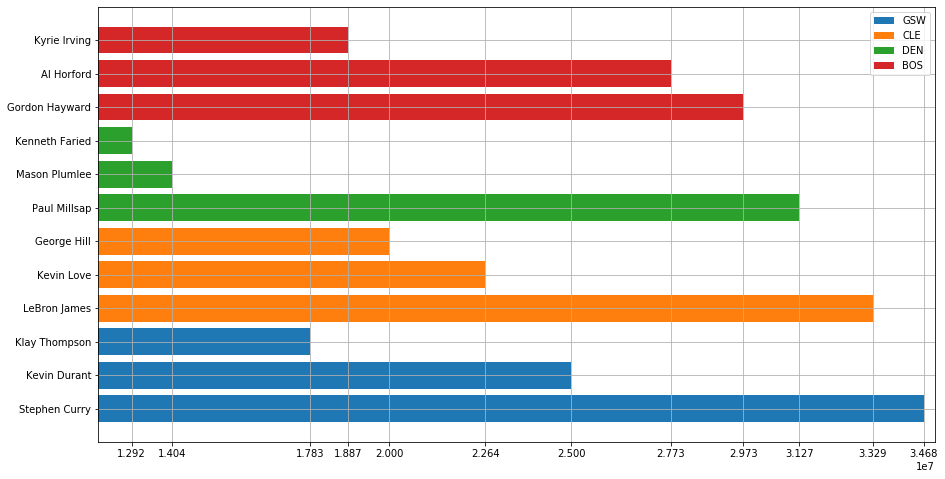

In [24]:
# Graf teh treh ekip in njihovih top 3 plačanih igralcev

fig, ax = plt.subplots(figsize=(15,8))

first_team = nba_data[nba_data["Tm"] == "GSW"].sort_values(by=["Salary"], ascending=False).iloc[:3]
second_team = nba_data[nba_data["Tm"] == "CLE"].sort_values(by=["Salary"], ascending=False).iloc[:3]
third_team = nba_data[nba_data["Tm"] == "DEN"].sort_values(by=["Salary"], ascending=False).iloc[:3]
fourth_team = nba_data[nba_data["Tm"] == "BOS"].sort_values(by=["Salary"], ascending=False).iloc[:3]


ax.barh(first_team["Player"], first_team["Salary"])
ax.barh(second_team["Player"], second_team["Salary"])
ax.barh(third_team["Player"], third_team["Salary"])
ax.barh(fourth_team["Player"], fourth_team["Salary"])

ax.set_xlim(1.2e7, 3.5e7)
ax.set_xticks(pd.concat([first_team["Salary"], second_team["Salary"], third_team["Salary"], fourth_team["Salary"]]))
ax.grid(True)
ax.legend(["GSW", "CLE", "DEN", "BOS"])

plt.show()



# USA Dream Team

In [ ]:
https://we.tl/t-ov702GKvl1

**Naloga**

Želimo sestaviti *USA Dream Team*. Želimo najti najboljšega USA igralca vsake pozicije. Kako dober je igralec je definirano v PER stolpcu. Večja kot je vrednost, boljši je igralec.

PER vrednost najdemo v .csv datoteki.

Ostale vrednosti imamo na voljo v SQLite3 **nba_pos.db** databazi v tabeli *NBA_additional_data*.
Naš DataFrame naj hrani vrednosti *Pos* kot 5 različnih kategorij.

Pozicije pri košarki so:
* Point Guard
* Shooting Guard
* Small Forward
* Power Forward
* Center
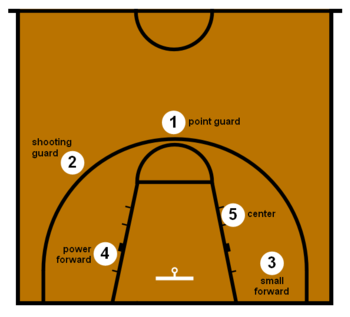


REŠITEV:
* C: LaMarcus Aldridge
* PG: David Stockton
* SG: Reggie Hearn
* SF: Anthony Brown
* PF: Anthony Davis

In [25]:
from sqlalchemy import create_engine

In [26]:
# Extracting values from SQLite database

eng = create_engine('sqlite:///data/nba_pos.db')
with eng.connect() as con:
    additional_data = pd.read_sql_table('NBA_additional_data', eng)
    
# Adding PER data to it
additional_data["PER"] = nba_data["PER"]

In [27]:
# Looking at this additonal data
print(additional_data.info())
additional_data.head()


# Stvari, ki jih lahko vn razberemo:
# --> Index stolpec je ubistvu dejanski index in mormo to naštimat pr našmu DataFrame-u
# --> Index stolpec ima 651 vrednosti (Player tud,...), naš DF ma 651 vrednosti. Ampak Pos stolpec ima 641 vrednosti.
# ----> Pos vsebuje nekaj Null vrednosti, katere hočemo drop-at
# --> Pos stolpec je non-null object, mi želimo da je category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
index      651 non-null int64
Player     651 non-null object
Pos        641 non-null object
Country    651 non-null object
PER        651 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 25.5+ KB
None


,index,Player,Pos,Country,PER
0,0,Zhou Qi,C,China,0.6
1,1,Zaza Pachulia,C,Georgia,16.8
2,2,Zach Randolph,PF,I live in United States of America,17.3
3,3,Zach LaVine,SG,USA,14.6
4,4,Zach Collins,C,USA,8.2


In [28]:
# Indexing our DF

additional_data.set_index(keys="index", inplace=True)
additional_data.head()

,Player,Pos,Country,PER
index,,,,
0,Zhou Qi,C,China,0.6
1,Zaza Pachulia,C,Georgia,16.8
2,Zach Randolph,PF,I live in United States of America,17.3
3,Zach LaVine,SG,USA,14.6
4,Zach Collins,C,USA,8.2


In [29]:
# Dropping NaN vrednosti:
# --> Checking the Pos column
print(additional_data["Pos"].value_counts(dropna = False) )
# Se vid da mamo podvojene stvari: 
# --> Dubbled values: C pa Center je isto. Enako za ostale pozicije
# --> NaN values. We want to drop those rows

additional_data.dropna(subset=["Pos", "PER"], inplace = True) # pogleda v Pos stolpec. Če ma NaN vrednost dropne un row
#additional_data.isnull().sum() # nukjer več ni null vrednosti
additional_data["Pos"].value_counts(dropna = False)

SG                140
PG                128
PF                106
C                 106
SF                103
Center             13
Power forward      13
Small forward      13
Shooting guard     10
NaN                10
Point guard         9
Name: Pos, dtype: int64


SG                140
PG                128
PF                106
C                 106
SF                103
Center             13
Small forward      13
Power forward      13
Shooting guard     10
Point guard         9
Name: Pos, dtype: int64

In [30]:
# Doubled values
additional_data.replace(to_replace="Small forward", value="SF", inplace=True)
additional_data.replace(to_replace="Power forward", value="PF", inplace=True)
additional_data.replace(to_replace="Point guard", value="PG", inplace=True)
additional_data.replace(to_replace="Shooting guard", value="SG", inplace=True)
additional_data.replace(to_replace="Center", value="C", inplace=True)

additional_data["Pos"].value_counts()

SG    150
PG    137
PF    119
C     119
SF    116
Name: Pos, dtype: int64

In [31]:
# Converting POS to Category
additional_data["Pos"] = additional_data["Pos"].astype('category')
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 650
Data columns (total 4 columns):
Player     641 non-null object
Pos        641 non-null category
Country    641 non-null object
PER        641 non-null float64
dtypes: category(1), float64(1), object(2)
memory usage: 20.9+ KB


In [32]:
additional_data["Country"].value_counts()

USA                                     282
I live in USA                            98
I come from USA                          84
United States of America                 31
I come from United States of America      9
I live in United States of America        8
Spain                                     8
Canada                                    8
Serbia                                    7
Australia                                 5
France                                    5
I live in Australia                       4
I live in Canada                          4
Brazil                                    4
Democratic Re...                          4
Montenegro                                4
I live in France                          3
Croatia                                   3
Germany                                   3
I come from Canada                        3
Cameroon                                  3
Turkey                                    3
I live in Latvia                

In [33]:
# Najdemo samo američane -> USA al pa United States of America

# additional_data["Country"].str.contains("USA|America") # dobiš filter True/False vrednosti
# additional_data[additional_data["Country"].str.contains("USA|America")] # Dobiš filtreran DF
usa_players = additional_data[additional_data["Country"].str.contains("USA|America")] # shraniš filtreran DF
usa_players["Country"].value_counts()

USA                                     282
I live in USA                            98
I come from USA                          84
United States of America                 31
I come from United States of America      9
I live in United States of America        8
Name: Country, dtype: int64

In [35]:
# Najdemo vse usa igralce na C poziciji
usa_players[usa_players["Pos"].isin(["SG"])].head()

,Player,Pos,Country,PER
index,,,,
3,Zach LaVine,SG,USA,14.6
5,Yogi Ferrell,SG,I come from USA,11.5
6,Xavier Silas,SG,USA,-4.9
8,Xavier Munford,SG,I come from USA,-2.1
17,Will Barton,SG,United States of America,15.9


In [36]:
# Finding best players in each position
best_C_players = usa_players[usa_players["Pos"].isin(["C"])] # grabs only C position
sorted_C = best_C_players.sort_values(by=["PER"], ascending=False) # sorts so we have best at the top
print(sorted_C["Player"].iloc[0]) # grabs 0 row -> best player

best_PG_players = usa_players[usa_players["Pos"].isin(["PG"])]
sorted_PG = best_PG_players.sort_values(by=["PER"], ascending=False) # sorts so we have best at the top
print(sorted_PG["Player"].iloc[0]) # grabs 0 row -> best player

best_SG_players = usa_players[usa_players["Pos"].isin(["SG"])]
sorted_SG = best_SG_players.sort_values(by=["PER"], ascending=False) # sorts so we have best at the top
print(sorted_SG["Player"].iloc[0]) # grabs 0 row -> best player

best_SF_players = usa_players[usa_players["Pos"].isin(["SF"])]
sorted_SF = best_SF_players.sort_values(by=["PER"], ascending=False) # sorts so we have best at the top
print(sorted_SF["Player"].iloc[0]) # grabs 0 row -> best player

best_PF_players = usa_players[usa_players["Pos"].isin(["PF"])]
sorted_PF = best_PF_players.sort_values(by=["PER"], ascending=False) # sorts so we have best at the top
print(sorted_PF["Player"].iloc[0]) # grabs 0 row -> best player


LaMarcus Aldridge
David Stockton
Reggie Hearn
Anthony Brown
Anthony Davis


# Best Players by stats

**Naloga**

Najdemo najboljšega igralca iz vsake statistike:

"TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%"


Dataset obdelujemo v *chunksize=250*

Izločimo vse igralce, ki imajo "MP"/"G" manjši ali enak 15.




REŠITEV:
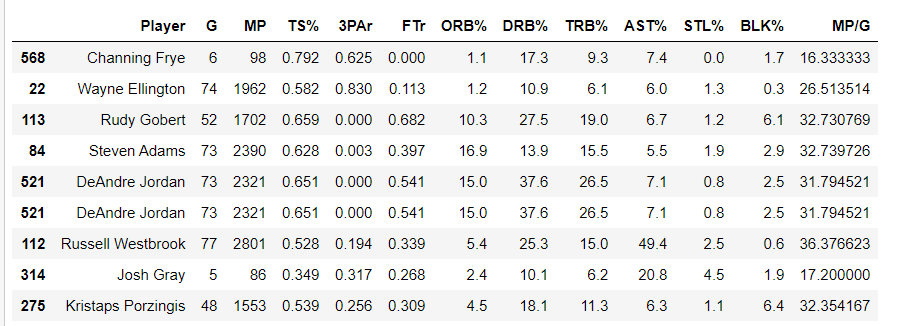

In [37]:
# Uvažanje po chunkih

chunk_iter = pd.read_csv('data/nba_data.csv', chunksize=250, 
                         usecols=["Player", "G", "MP", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%"])

for chunk in chunk_iter:
    chunk["MP/G"] = chunk["MP"].values / chunk["G"].values
    chunk = chunk[chunk["MP/G"] > 15]
    print(chunk)

                      Player   G    MP    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
2              Zach Randolph  59  1508  0.529  0.193  0.140   7.0  23.8  15.0   
3                Zach LaVine  24   656  0.499  0.346  0.301   1.4  14.4   7.7   
4               Zach Collins  62   979  0.487  0.387  0.146   4.9  18.3  11.7   
5               Yogi Ferrell  79  2238  0.543  0.489  0.141   1.3  11.3   6.1   
7        Xavier Rathan-Mayes   5   118  0.315  0.333  0.214   0.0   5.0   2.5   
9            Wilson Chandler  70  2200  0.543  0.390  0.186   5.0  14.0   9.5   
16       Willie Cauley-Stein  70  1943  0.523  0.017  0.320   7.2  21.7  14.1   
17               Will Barton  77  2530  0.557  0.409  0.221   2.9  14.2   8.6   
18           Wesley Matthews  63  2131  0.541  0.577  0.145   1.4   9.1   5.2   
19            Wesley Johnson  70  1422  0.512  0.484  0.157   2.1  14.0   8.1   
20             Wesley Iwundu  58   902  0.464  0.205  0.215   4.0  11.8   7.9   
21              Wayne Selden

                Player   G    MP    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
501       Derrick Rose  16   308  0.523  0.182  0.311   3.7   6.8   5.3  13.0   
502       Derrick Rose  21   366  0.515  0.164  0.267   4.0   6.0   5.1  14.6   
503      Derrick Jones  13   212  0.465  0.333  0.375  10.1   8.0   9.0   4.0   
506     Derrick Favors  73  2044  0.594  0.084  0.319  10.6  18.4  14.5   8.0   
507   Denzel Valentine  77  2095  0.527  0.513  0.071   2.4  18.3  10.0  17.8   
508       Dennis Smith  67  1978  0.475  0.333  0.189   2.6  11.8   7.1  29.0   
509    Dennis Schroder  67  2078  0.515  0.229  0.231   2.4   8.8   5.6  36.4   
513    DeMarre Carroll  73  2180  0.550  0.498  0.313   5.0  18.4  11.7  10.6   
514   DeMarcus Cousins  48  1737  0.583  0.340  0.456   6.8  31.0  19.3  23.2   
515      DeMar DeRozan  77  2616  0.558  0.202  0.399   2.4  10.4   6.5  24.8   
516       Delon Wright  65  1339  0.577  0.342  0.261   3.8  11.5   7.7  19.8   
517    Dejounte Murray  78  

In [38]:
statistics = ("TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%")

_dict = {
    "TS%": pd.DataFrame(), 
    "3PAr": pd.DataFrame(), 
    "FTr": pd.DataFrame(), 
    "ORB%": pd.DataFrame(), 
    "DRB%": pd.DataFrame(), 
    "TRB%": pd.DataFrame(), 
    "AST%": pd.DataFrame(), 
    "STL%": pd.DataFrame(), 
    "BLK%": pd.DataFrame()
}


chunk_iter = pd.read_csv('data/nba_data.csv', chunksize=250, 
                         usecols=["Player", "G", "MP", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%"])

for chunk in chunk_iter:
    chunk["MP/G"] = chunk["MP"].values / chunk["G"].values
    chunk = chunk[chunk["MP/G"] > 15]
    
    for stat in statistics:
        chunk_max = chunk[stat].max()
        if _dict[stat].empty or _dict[stat][stat].iloc[0] < chunk_max:
            _dict[stat] = chunk[chunk[stat] == chunk_max]
        
players = pd.concat(_dict.values())
players

# TS%   Channing Frye
# 3PAr  Wayne Ellington
# FTr   Rudy Gobert
# ORB%  Steven Adams
# DRB%  DeAndre Jordan
# TRB%  DeAndre Jordan
# AST%  Russell Westbrook
# STL%  Josh Gray
# BLK%  Kristaps Porzingis

,Player,G,MP,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,MP/G
568,Channing Frye,6,98,0.792,0.625,0.000,1.1,17.3,9.3,7.4,0.0,1.7,16.333333
22,Wayne Ellington,74,1962,0.582,0.830,0.113,1.2,10.9,6.1,6.0,1.3,0.3,26.513514
113,Rudy Gobert,52,1702,0.659,0.000,0.682,10.3,27.5,19.0,6.7,1.2,6.1,32.730769
84,Steven Adams,73,2390,0.628,0.003,0.397,16.9,13.9,15.5,5.5,1.9,2.9,32.739726
521,DeAndre Jordan,73,2321,0.651,0.000,0.541,15.0,37.6,26.5,7.1,0.8,2.5,31.794521
521,DeAndre Jordan,73,2321,0.651,0.000,0.541,15.0,37.6,26.5,7.1,0.8,2.5,31.794521
112,Russell Westbrook,77,2801,0.528,0.194,0.339,5.4,25.3,15.0,49.4,2.5,0.6,36.376623
314,Josh Gray,5,86,0.349,0.317,0.268,2.4,10.1,6.2,20.8,4.5,1.9,17.200000
275,Kristaps Porzingis,48,1553,0.539,0.256,0.309,4.5,18.1,11.3,6.3,1.1,6.4,32.354167


# ML

**Naloga**

S pomočjo statističnih stolpcev igralcev ("TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%") bomo preko linearne regresije napovedali vrednost *PER*.

Train / Test = 80% / 20%

```python
train_test_split(X, y, test_size=0.2, random_state=0)
```

REŠITEV:
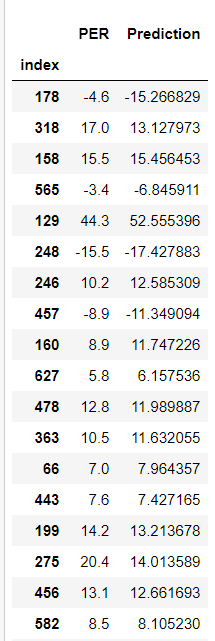

In [39]:
# Ivozimo data spet, da imamo clean podatke
nba_data = pd.read_csv('data/nba_data.csv')
nba_data.head()

,index,Player,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
0,0,Zhou Qi,43,"$815,615",MLE,"$815,615",22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8
1,1,Zaza Pachulia,42,"$3,477,600",NaN,"$3,477,600",33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3
2,2,Zach Randolph,19,"$12,307,692",Cap space,"$24,000,000",36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6
3,3,Zach LaVine,13,"$3,202,217",1st Round Pick,"$3,202,217",22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5
4,4,Zach Collins,10,"$3,057,240",1st Round Pick,"$6,686,160",20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5


In [43]:
# Index stolpec spremenimo v dejanski index DF
nba_data.set_index(keys="index", inplace=True)
nba_data.head()

,Player,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
index,,,,,,,,,,,,,,,,,,,
0,Zhou Qi,43,"$815,615",MLE,"$815,615",22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8
1,Zaza Pachulia,42,"$3,477,600",NaN,"$3,477,600",33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3
2,Zach Randolph,19,"$12,307,692",Cap space,"$24,000,000",36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6
3,Zach LaVine,13,"$3,202,217",1st Round Pick,"$3,202,217",22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5
4,Zach Collins,10,"$3,057,240",1st Round Pick,"$6,686,160",20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5


In [42]:
# Pogledamo DF
nba_data.info()

# Vidmo da mamo par NaN vrednost, katere moramo izločiti. V stolpcih TS%, 3PAr, FTr

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 19 columns):
Player             651 non-null object
NBA_DraftNumber    651 non-null int64
Salary             651 non-null object
Signed Using       431 non-null object
Guaranteed         651 non-null object
Age                651 non-null int64
Tm                 651 non-null object
G                  651 non-null int64
MP                 651 non-null int64
PER                651 non-null float64
TS%                647 non-null float64
3PAr               647 non-null float64
FTr                647 non-null float64
ORB%               651 non-null float64
DRB%               651 non-null float64
TRB%               651 non-null float64
AST%               651 non-null float64
STL%               651 non-null float64
BLK%               651 non-null float64
dtypes: float64(10), int64(4), object(5)
memory usage: 101.7+ KB


In [44]:
# pogledamo, katere vrstice so to
nba_data[nba_data["TS%"].isnull()]

,Player,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
index,,,,,,,,,,,,,,,,,,,
37,Tyler Lydon,24,"$1,579,440",1st Round Pick,"$3,454,080",21,DEN,1,2,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
47,Trey McKinney-Jones,62,"$46,080",NaN,$0,27,IND,1,1,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
133,Rashad Vaughn,17,"$1,889,040",NaN,"$1,889,040",21,BRK,1,4,4.1,NaN,NaN,NaN,0.0,0.0,0.0,31.8,0.0,0.0
609,Ben Moore,62,$0,NaN,$0,22,IND,2,9,-2.3,NaN,NaN,NaN,0.0,12.5,6.3,13.1,0.0,0.0


In [45]:
# Izločimo vrstice, ki imajo v stolpcih (subset) vrednosti NaN
nba_data.dropna(subset=["TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%"], inplace=True)

In [46]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 650
Data columns (total 19 columns):
Player             647 non-null object
NBA_DraftNumber    647 non-null int64
Salary             647 non-null object
Signed Using       430 non-null object
Guaranteed         647 non-null object
Age                647 non-null int64
Tm                 647 non-null object
G                  647 non-null int64
MP                 647 non-null int64
PER                647 non-null float64
TS%                647 non-null float64
3PAr               647 non-null float64
FTr                647 non-null float64
ORB%               647 non-null float64
DRB%               647 non-null float64
TRB%               647 non-null float64
AST%               647 non-null float64
STL%               647 non-null float64
BLK%               647 non-null float64
dtypes: float64(10), int64(4), object(5)
memory usage: 101.1+ KB


In [47]:
# Ustvarimo naš model

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [48]:
# razdelimo DF na train in test na 80%, 20%
X = nba_data[["TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%"]]
y = nba_data[["PER"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [49]:
# Ustvarimo naš model in ga fittamo z train podatki
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Naredimo predikcije za test data
y_pred = regressor.predict(X_test)
#y_pred

In [51]:
# Če hočmo številčne vrednosti si pogledat
df_ = y_test.copy()
df_["Prediction"] = y_pred
df_.head(20)

,PER,Prediction
index,,
178,-4.6,-15.266829
318,17.0,13.127973
158,15.5,15.456453
565,-3.4,-6.845911
129,44.3,52.555396
248,-15.5,-17.427883
246,10.2,12.585309
457,-8.9,-11.349094
160,8.9,11.747226


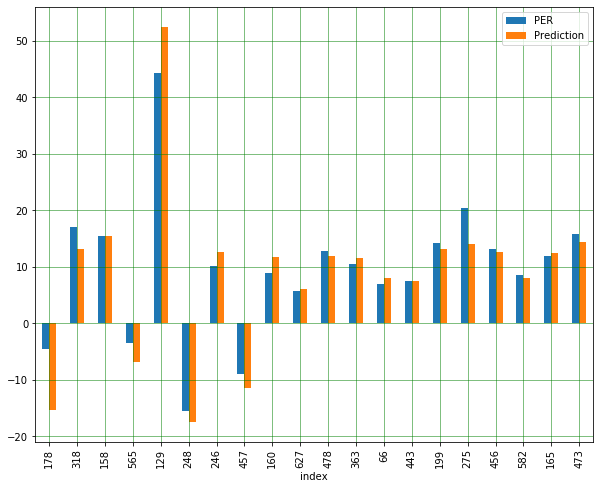

In [52]:
# Plot teh vrednosti, če hočmo grafično pogledat
df_.head(20).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()